<h3><font style="color:red;">Deep MLP Implementation on  Cifar10 Dataset</font></h3>

* The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. 
* To use the cifar10 dataset in Keras, an API is provided to download and extract images and labels automatically

### Import All Necessary Libararies

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras import Sequential
from tensorflow.python.keras import regularizers
from tensorflow.keras.layers import Dense,Dropout,Activation,MaxPooling2D,Flatten,Conv2D
from tensorflow import keras

### Load the Cifar10 Dataset from Keras Datasets

In [3]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### View Dimensions of Dataset

In [4]:
print('X Training shape: ',X_train.shape)
print('Y Training shape: ',y_train.shape)
print('X Testing shape: ',X_test.shape)
print('Y Testing shape: ',y_test.shape)

X Training shape:  (50000, 32, 32, 3)
Y Training shape:  (50000, 1)
X Testing shape:  (10000, 32, 32, 3)
Y Testing shape:  (10000, 1)


* The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.  
* It has a training set of 50,000 images, and 10,000 test images that are classified into corresponding categories or labels.


### Checking the number of unique classes 

In [5]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Creating a list of all the class labels

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

* The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. 


### count the number of unique  labels

In [7]:

unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}

Test labels:  {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}


* There are 6,000 images of each class.

### Plot the images

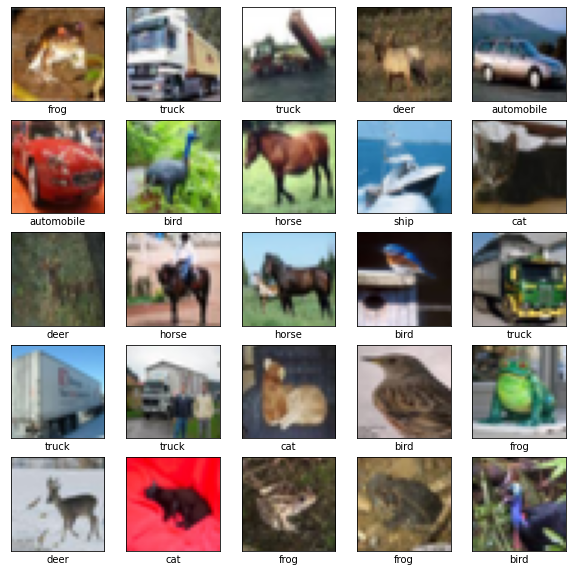

In [8]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):
    # for first 25 images
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
 
plt.show()


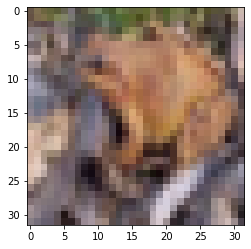

Digit in image is  [3]


In [9]:
plt.imshow(X_train[204])
plt.show()
print("Digit in image is ",y_train[203])

### Data Preprocessing

In [10]:
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)
X_train.shape

(50000, 3072)

### Since the images are pixels ranging from 0 to 255, so normalize them

In [11]:
print(X_train.max())
print(X_train.min())
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.max())
print(X_train.min())

255
0
1.0
0.0


In [12]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
X_train[200].shape

(3072,)

### Build Model Aritecture 

In [14]:
model = Sequential() 
model.add(Dense(1024,input_shape = (3072,),activation="relu"))
model.add(Dense(units = 512,kernel_regularizer=regularizers.l2(0.01),activation= "relu"))
model.add(Dense(units = 256,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation= "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 64,activation= "relu"))
model.add(Dense(units = 32,activation= "relu"))
model.add(Dense(units = 16,activation= "relu"))
model.add(Dense(units = 10,activation= "softmax"))


### View model summary

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8

### Plot the model

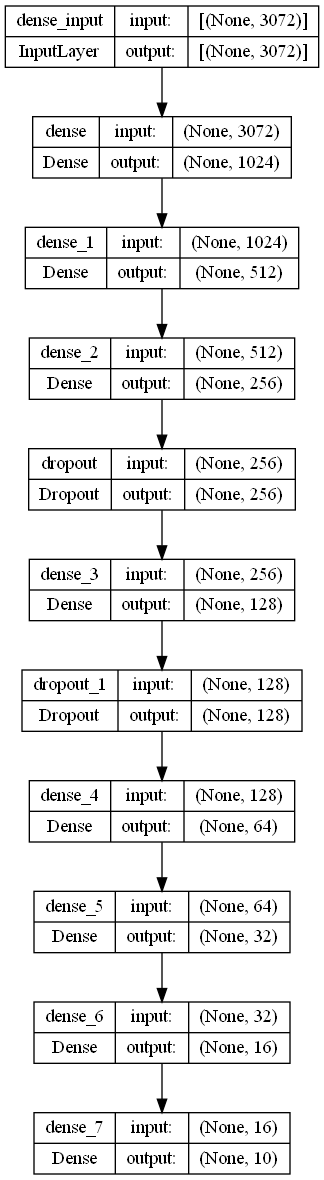

In [16]:
from keras.utils import  plot_model
plot_model(model, to_file='cifar10_ann.png', show_shapes=True)

### Compile the model

In [19]:
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [20]:
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_split=0.2)

Epoch 1/200
313/313 [==============================] - 16s 50ms/step - loss: 8.7233 - accuracy: 0.1097 - val_loss: 8.2997 - val_accuracy: 0.1604
Epoch 2/200
313/313 [==============================] - 12s 39ms/step - loss: 7.9277 - accuracy: 0.1398 - val_loss: 7.5101 - val_accuracy: 0.1737
Epoch 3/200
313/313 [==============================] - 12s 39ms/step - loss: 7.1652 - accuracy: 0.1766 - val_loss: 6.7732 - val_accuracy: 0.2133
Epoch 4/200
313/313 [==============================] - 13s 40ms/step - loss: 6.5016 - accuracy: 0.1948 - val_loss: 6.1843 - val_accuracy: 0.2147
Epoch 5/200
313/313 [==============================] - 13s 42ms/step - loss: 5.9462 - accuracy: 0.2083 - val_loss: 5.6618 - val_accuracy: 0.2295
Epoch 6/200
313/313 [==============================] - 15s 49ms/step - loss: 5.4571 - accuracy: 0.2238 - val_loss: 5.1983 - val_accuracy: 0.2530
Epoch 7/200
313/313 [==============================] - 12s 39ms/step - loss: 5.0157 - accuracy: 0.2462 - val_loss: 4.7861 - val_ac

313/313 [==============================] - 28s 88ms/step - loss: 0.7849 - accuracy: 0.7786 - val_loss: 2.0517 - val_accuracy: 0.5327
Epoch 114/200
313/313 [==============================] - 29s 91ms/step - loss: 0.7688 - accuracy: 0.7868 - val_loss: 2.0416 - val_accuracy: 0.5287
Epoch 115/200
313/313 [==============================] - 28s 88ms/step - loss: 0.7749 - accuracy: 0.7846 - val_loss: 2.0167 - val_accuracy: 0.5261
Epoch 116/200
313/313 [==============================] - 27s 88ms/step - loss: 0.7912 - accuracy: 0.7802 - val_loss: 2.0176 - val_accuracy: 0.5272
Epoch 117/200
313/313 [==============================] - 29s 91ms/step - loss: 0.7702 - accuracy: 0.7850 - val_loss: 2.0250 - val_accuracy: 0.5319
Epoch 118/200
313/313 [==============================] - 29s 92ms/step - loss: 0.7667 - accuracy: 0.7918 - val_loss: 2.0683 - val_accuracy: 0.5271
Epoch 119/200
313/313 [==============================] - 25s 80ms/step - loss: 0.7585 - accuracy: 0.7941 - val_loss: 2.0300 - val_ac

Epoch 169/200
313/313 [==============================] - 24s 76ms/step - loss: 0.5646 - accuracy: 0.8788 - val_loss: 2.4803 - val_accuracy: 0.5234
Epoch 170/200
313/313 [==============================] - 24s 78ms/step - loss: 0.6033 - accuracy: 0.8687 - val_loss: 2.4327 - val_accuracy: 0.5273
Epoch 171/200
313/313 [==============================] - 23s 75ms/step - loss: 0.5811 - accuracy: 0.8744 - val_loss: 2.4883 - val_accuracy: 0.5270
Epoch 172/200
313/313 [==============================] - 24s 76ms/step - loss: 0.5577 - accuracy: 0.8846 - val_loss: 2.5671 - val_accuracy: 0.5205
Epoch 173/200
313/313 [==============================] - 24s 77ms/step - loss: 0.5760 - accuracy: 0.8766 - val_loss: 2.6828 - val_accuracy: 0.5006
Epoch 174/200
313/313 [==============================] - 26s 83ms/step - loss: 0.5552 - accuracy: 0.8855 - val_loss: 2.5173 - val_accuracy: 0.5337
Epoch 175/200
313/313 [==============================] - 24s 75ms/step - loss: 0.5501 - accuracy: 0.8857 - val_loss: 2

### Evaluating model performance

In [21]:
print("Training Accuracy")
print(model.evaluate(X_train,y_train))
print("Test accuracy")
print(model.evaluate(X_test,y_test))

Training Accuracy
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9127 - accuracy: 0.8388
[0.9127097129821777, 0.8388199806213379]
Test accuracy
313/313 [==============================] - 7s 21ms/step - loss: 2.7078 - accuracy: 0.5174
[2.707792282104492, 0.5174000263214111]


### Plot accuracy and loss graph

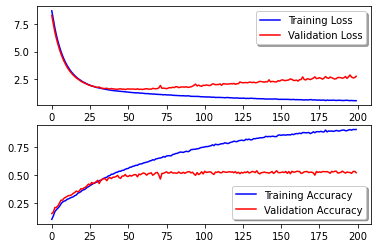

In [22]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Plot Confusion Matrix

In [23]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 11s 24ms/step


<AxesSubplot:>

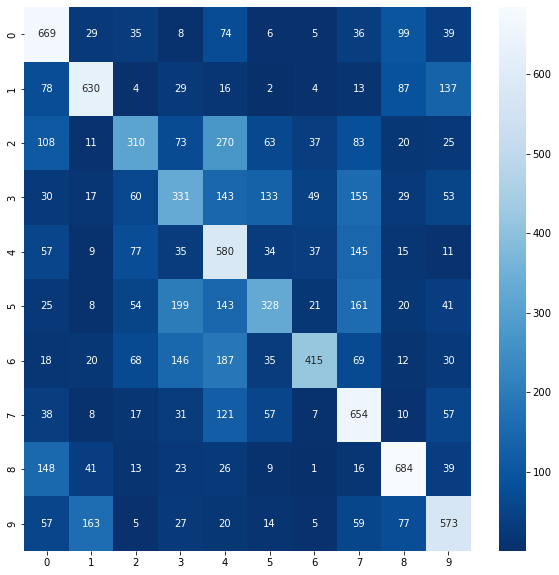

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mtx, annot=True, fmt='g',cmap='Blues_r')

### Classification Report

In [25]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.54      0.67      0.60      1000
           1       0.67      0.63      0.65      1000
           2       0.48      0.31      0.38      1000
           3       0.37      0.33      0.35      1000
           4       0.37      0.58      0.45      1000
           5       0.48      0.33      0.39      1000
           6       0.71      0.41      0.52      1000
           7       0.47      0.65      0.55      1000
           8       0.65      0.68      0.67      1000
           9       0.57      0.57      0.57      1000

    accuracy                           0.52     10000
   macro avg       0.53      0.52      0.51     10000
weighted avg       0.53      0.52      0.51     10000



### Save the Model

In [26]:
model.save("cifar_seq.h5")